'\nplot(0,0,"s1 05_06_2022",0,0)\nplot(1,0,"s1 05_06_2022",58.8889,11.8399)\nplot(2,0,"s1 05_09_2022",77.7059,11.6471)\nplot(3,0,"s1 05_10_2022",83.9091,9.4339)\nplot(4,0,"s1 05_11_2022",91.6250,6.3567)\nplot(5,0,"s1 05_12_2022",85.3636,7.5825)\n\nplot(0,1, "s2 5_17_2022",80.0769,13.1020)\nplot(1,1, "s2 5_18_2022",74.0000,17.693)\nplot(2,1, "s2 5_20_2022",82.0833,7.717)\nplot(3,1, "s2 5_23_2022",88.6667,7.2953)\nplot(4,1, "n/a",0,0)\nplot(5,1, "n/a",0,0)\n'

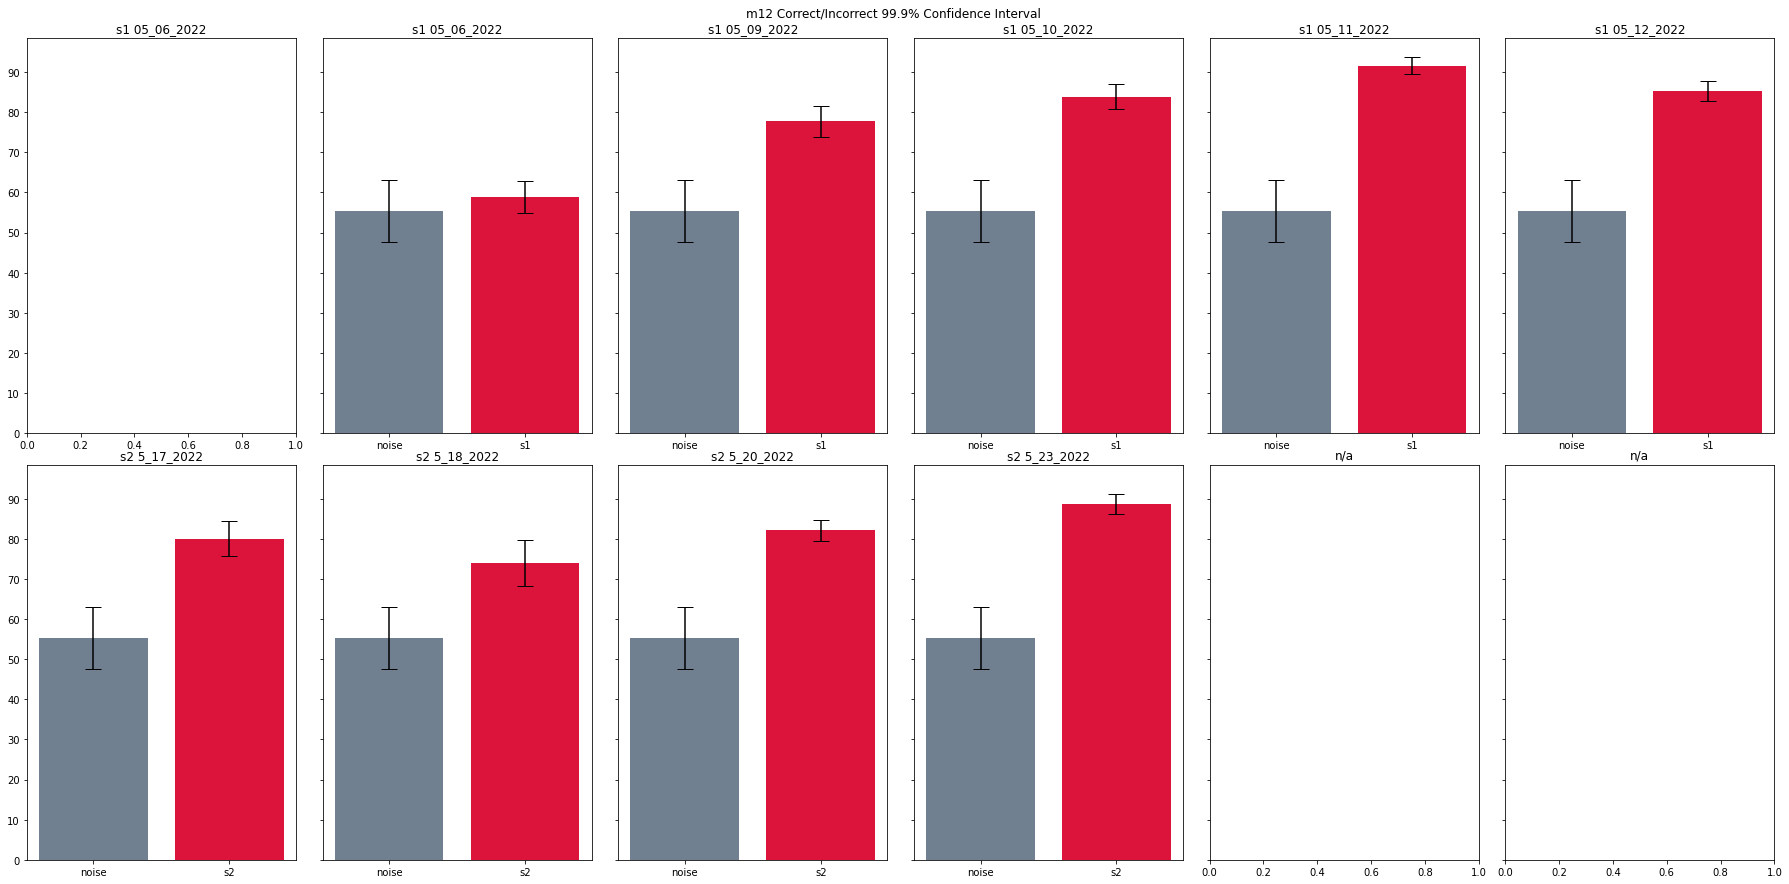

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import math

fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(25,12), sharey=True)
fig.suptitle("m12 Correct/Incorrect 99.9% Confidence Interval",y=1.02)
plt.tight_layout()
legs = 8
b_acc = 55.3333
b_stdev = 23.5106

def conf(stdev, level=0.999, trials=100):
    if level==0.95:
        z = 1.960
    elif level==0.99:
        z=2.576
    elif level==0.999:
        z=3.291
    return z*stdev/math.sqrt(trials)

plt.yticks([0,10,20,30,40,50,60,70,80,90,100])

def plot(x,y,title,acc,stdev,b_acc=b_acc,b_stdev=b_stdev):
    ax[x,y].title.set_text(title)
    if acc!=0:
        ax[x,y].bar(["noise",title[:2]], [b_acc,acc], yerr=[conf(b_stdev), conf(stdev)], 
                    capsize=legs, color=["slategray","crimson"])
#Horizontal graphs
plot(0,0,"s1 05_06_2022",0,0)
plot(0,1,"s1 05_06_2022",58.8889,11.8399)
plot(0,2,"s1 05_09_2022",77.7059,11.6471)
plot(0,3,"s1 05_10_2022",83.9091,9.4339)
plot(0,4,"s1 05_11_2022",91.6250,6.3567)
plot(0,5,"s1 05_12_2022",85.3636,7.5825)

plot(1,0, "s2 5_17_2022",80.0769,13.1020)
plot(1,1, "s2 5_18_2022",74.0000,17.693)
plot(1,2, "s2 5_20_2022",82.0833,7.717)
plot(1,3, "s2 5_23_2022",88.6667,7.2953)
plot(1,4, "n/a",0,0)
plot(1,5, "n/a",0,0)

#Vertical graphs
"""
plot(0,0,"s1 05_06_2022",0,0)
plot(1,0,"s1 05_06_2022",58.8889,11.8399)
plot(2,0,"s1 05_09_2022",77.7059,11.6471)
plot(3,0,"s1 05_10_2022",83.9091,9.4339)
plot(4,0,"s1 05_11_2022",91.6250,6.3567)
plot(5,0,"s1 05_12_2022",85.3636,7.5825)

plot(0,1, "s2 5_17_2022",80.0769,13.1020)
plot(1,1, "s2 5_18_2022",74.0000,17.693)
plot(2,1, "s2 5_20_2022",82.0833,7.717)
plot(3,1, "s2 5_23_2022",88.6667,7.2953)
plot(4,1, "n/a",0,0)
plot(5,1, "n/a",0,0)
"""

<ErrorbarContainer object of 3 artists>

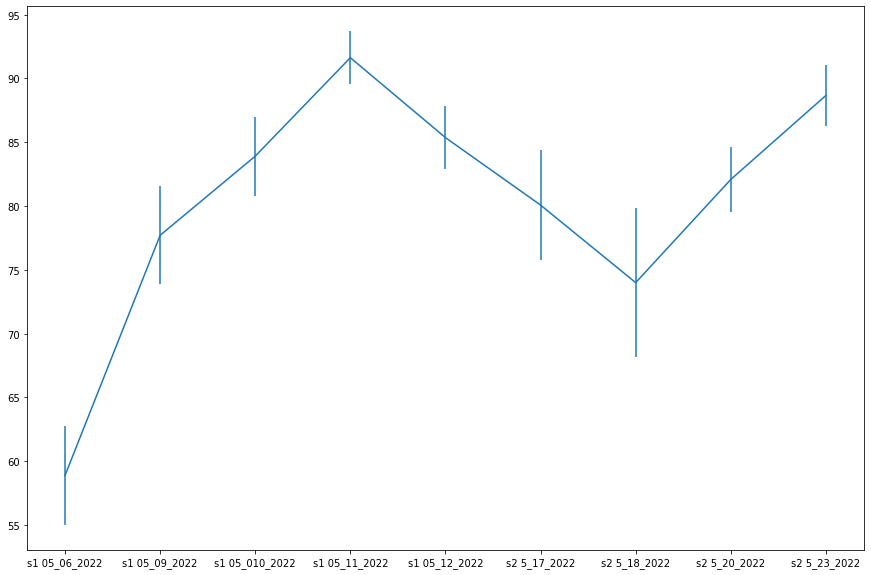

In [76]:
trials = ["s1 05_06_2022","s1 05_09_2022","s1 05_010_2022",
          "s1 05_11_2022","s1 05_12_2022","s2 5_17_2022","s2 5_18_2022",
          "s2 5_20_2022","s2 5_23_2022"]
accs = [58.8889,77.7059,83.9091,91.6250,85.3636,80.0769,74.0000,82.0833,88.6667]
stdevs = [11.8399,11.6471,9.4339,6.3567,7.5825,13.1020,17.693,7.717,7.2953]
confs = np.vectorize(conf)
errs = confs(stdevs)

plt.figure(figsize=(15,10))
plt.errorbar(trials, accs, yerr=errs)